<h1> Project: Sleep Quality Data Analysis </h1>
<h2> Names: Jingzhi Yang, Wenhan Bo </h2>
<h3><a href="https://yship1002.github.io">https://yship1002.github.io</a></h3>

<h1 style="text-align:left">Project Goal</h1>
<p>We plan to use two public sleep quality datasets we found to answer the following questions through the extraction, analysis, and visualization of data.</p>
<p>1. Which factors have the biggest impact on sleep quality?</p>
<p>2. What can we do to improve sleep quality in this modern society? </p>

<h1 style="text-align:left">Datasets</h1>
<p>We believed the following two datasets have all the necessary information we need in order to answer the questions posted above. We also provided descriptions of our datasets as well as how we are going to use them.</p>
<p>Dataset 1: <a href="https://www.kaggle.com/datasets/arashnic/fitbit">FitBit Fitness Tracker dataset</a></p>
<p>This is a public dataset from Kaggle where 30 FitBit users consented to submit their personal fitness data for analysis. Fitbit trackers on these participants record a lot of useful data including sleep quality, sleep during the day, daily steps, weights, heartrates and daily calories consumption. This dataset is a series of several CSV files where each CSV file stores one feature of fitness data. Each participant is labeled with a unique ID in those CSV files which makes it easier for us to correlate sleep behaviors with daily activities by joining the tables to answer our project questions.</p>
<p>Dataset 2: <a href="https://www.kaggle.com/datasets/danagerous/sleep-data">Sleep Cycle iOS App dataset</a></p>
<p>This dataset is collected by a user using Sleep Cycle iOS app to record his sleep behavior. We are using this dataset because it provides a quantitative measure of sleep quality data so that we can perform quantitative analysis </p>

<h1 style="text-align:left">Collaboration Plan</h1>
<p>Since we will be working with two different data sets, it makes sense to divide the work into half. Jingzhi will be working on FitBit Fitness Tracker dataset while Wenhan will be working on Sleep Cycle iOS App dataset. Both datasets come from Kaggle. We will be using python as our programming language and panda,numpy,matplotlib packages will be used to analyze and visualize the data. We plan to meet twice every week, one in Wednesday morning and the other in Sunday evening to discuss our progress and share our findings. We agreed to set up a google doc to share useful resources as well as any interesting findings worth mentioning in our weekly meetings.</p>

<h1 style="text-align:left">Exploratory Data Analysis</h1>
<h2 style="text-align:left">Part 1: FitBit Fitness Tracker Dataset</h2>
<p>The first step is to load the datasets into dataframe lists since we have many csv files.</p>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
#Store a series of tables in df_list dictionary
files=os.listdir("../data/FitBitData")
df_list={file[:file.find("_")]:pd.read_csv("../data/FitBitData/"+file) for file in files}
df_list.keys()

dict_keys(['minuteIntensitiesWide', 'dailyActivity', 'sleepDay', 'heartrate', 'minuteIntensitiesNarrow', 'minuteMETsNarrow', 'hourlySteps', 'hourlyIntensities', 'dailyCalories', 'hourlyCalories', 'minuteSleep', 'minuteCaloriesNarrow', 'dailySteps', 'minuteCaloriesWide', 'minuteStepsNarrow', 'minuteStepsWide', 'weightLogInfo', 'dailyIntensities'])

<p>We started with sleepDay data. It looks like panda determine the data types correctly</p>

In [2]:
# Data preprocessing rename column as well as clean the 'activityday'
sleepDay=df_list["sleepDay"]
display(sleepDay.dtypes)
sleepDay.head()

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


Sleepday column includes too many details we want to convert it to just date in order to match other tables

In [3]:
# Rename column to match other tables for future work as well as reformat sleepday column
sleepDay.rename(columns={"SleepDay":'ActivityDay'},inplace=True)
sleepDay['ActivityDay']=[x[:x.find(" ")] for x in sleepDay['ActivityDay']]
sleepDay.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,1,327,346
1,1503960366,4/13/2016,2,384,407
2,1503960366,4/15/2016,1,412,442
3,1503960366,4/16/2016,2,340,367
4,1503960366,4/17/2016,1,700,712


<h3 style="text-align:left">How long does it take to fall asleep on avg?</h3>
<p>It is no secret that modern people like to use cell phones on bed before falling asleep. We believe that using cell phone before falling asleep has an impact on sleep quality. We are curious how long does it take for average people to go to sleep after they are on bed. We subtracted total time spent on bed by total time falling asleep to get the time people spend on bed before falling asleep</p>

In [4]:
# Add a new column to calculate minutesbeforesleep
sleepDay['MinutesBeforeSleep']=sleepDay['TotalTimeInBed']-sleepDay['TotalMinutesAsleep']
display(sleepDay.head())
display(sleepDay['MinutesBeforeSleep'].describe())

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,MinutesBeforeSleep
0,1503960366,4/12/2016,1,327,346,19
1,1503960366,4/13/2016,2,384,407,23
2,1503960366,4/15/2016,1,412,442,30
3,1503960366,4/16/2016,2,340,367,27
4,1503960366,4/17/2016,1,700,712,12


count    413.000000
mean      39.171913
std       46.570095
min        0.000000
25%       17.000000
50%       25.000000
75%       40.000000
max      371.000000
Name: MinutesBeforeSleep, dtype: float64

Well it looks like people on average spend 40 mins on bed before sleep. The maximum time before bed is 371 mins (Netflix??? Disney??? Hulu???)

<h3 style="text-align:left">Does getting more daily steps increases sleeping time?</h3>
<p>We also wonder if walking a lot during the day has an impact on sleeping quality which is reflected by sleeping time. After all it seems to be the reason why there are so many step tracking apps out there. We plot daily steps against sleep minutes to see if there is positive correlation. Before plotting we need to merge sleepDay table with dailyStep table</p>

Text(0, 0.5, 'SleepMinutes')

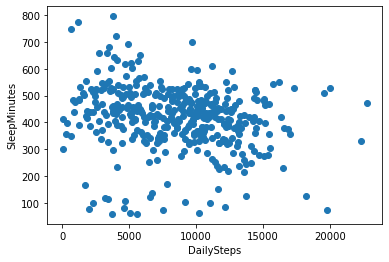

In [5]:
# merge sleepDay table with dailyStep table to link sleeptime with steps
sleep_step=sleepDay.merge(df_list['dailySteps'],on=["Id","ActivityDay"],how="inner")
plt.scatter(sleep_step['StepTotal'],sleep_step['TotalMinutesAsleep'])
plt.xlabel("DailySteps")
plt.ylabel("SleepMinutes")

<p>It doesn't appear that getting more daily steps helps sleeping time. In fact, there appears to be a weak negative correlation. Running a correlation matrix support our observation based on the graph</p>

In [6]:
sleep_step.corr()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,MinutesBeforeSleep,StepTotal
Id,1.000000,-0.012552,0.080117,0.002112,-0.197831,0.011345
TotalSleepRecords,-0.012552,1.000000,0.165912,0.172917,0.050317,-0.162490
TotalMinutesAsleep,0.080117,0.165912,1.000000,0.930457,-0.001762,-0.186866
TotalTimeInBed,0.002112,0.172917,0.930457,1.000000,0.364760,-0.164060
MinutesBeforeSleep,-0.197831,0.050317,-0.001762,0.364760,1.000000,0.027108
StepTotal,0.011345,-0.162490,-0.186866,-0.164060,0.027108,1.000000


<h2 style="text-align:left">Part 2: Sleep Cycle iOS App dataset</h2>
<p>Now let us explore what is out there in the second dataset. Loading is easier since there are only 1 file compared to a list of csv files in the first dataset</p>

In [7]:
# Load the data and take a peek
sleep2=pd.read_csv("../data/sleepdata_2.csv",delimiter=";")
display(sleep2.dtypes)
sleep2.head()

Start                           object
End                             object
Sleep Quality                   object
Regularity                      object
Mood                           float64
Heart rate (bpm)                 int64
Steps                            int64
Alarm mode                      object
Air Pressure (Pa)              float64
City                            object
Movements per hour             float64
Time in bed (seconds)          float64
Time asleep (seconds)          float64
Time before sleep (seconds)    float64
Window start                    object
Window stop                     object
Did snore                         bool
Snore time                     float64
Weather temperature (°C)       float64
Weather type                    object
Notes                           object
dtype: object

,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes
0,2019-05-12 23:26:13,2019-05-13 06:11:03,60%,0%,NaN,0,8350,Normal,NaN,NaN,...,24289.2,22993.8,161.9,2019-05-13 06:00:00,2019-05-13 06:00:00,True,92.0,0.0,No weather,NaN
1,2019-05-13 22:10:31,2019-05-14 06:10:42,73%,0%,NaN,0,4746,Normal,NaN,NaN,...,28810.2,25160.9,192.1,2019-05-14 05:50:00,2019-05-14 05:50:00,True,0.0,0.0,No weather,NaN
2,2019-05-14 21:43:00,2019-05-15 06:10:41,86%,96%,NaN,0,4007,Normal,NaN,NaN,...,30461.5,28430.8,203.1,2019-05-15 05:50:00,2019-05-15 05:50:00,True,74.0,0.0,No weather,NaN
3,2019-05-15 23:11:51,2019-05-16 06:13:59,77%,92%,NaN,0,6578,Normal,NaN,NaN,...,25327.6,23132.5,168.9,2019-05-16 05:50:00,2019-05-16 05:50:00,True,0.0,0.0,No weather,NaN
4,2019-05-16 23:12:13,2019-05-17 06:20:32,78%,94%,NaN,0,4913,Normal,NaN,NaN,...,25698.4,22614.6,171.3,2019-05-17 05:50:00,2019-05-17 05:50:00,True,188.0,0.0,No weather,NaN


Data in this dataset is much messier than the last one. Let us start with dropping columns. At first glance, it looks like mood, heartrate and notes column should be dropped since they don't contain any useful information.There are also NaN values out there we need to get rid of them. Then we need to make sure data types are correct

In [8]:
# Drop irrelevant columns
sleep2=sleep2.drop(['Mood','Notes','Heart rate (bpm)'],axis=1)
# Drop rows with empty values
sleep2=sleep2.dropna(axis=0)
# Convert data type into correct format
for index in sleep2.index:
    sleep2.loc[index,"Sleep Quality"]=sleep2.loc[index,"Sleep Quality"][:sleep2.loc[index,"Sleep Quality"].find("%")]
    sleep2.loc[index,"Regularity"]=sleep2.loc[index,"Regularity"][:sleep2.loc[index,"Regularity"].find("%")]
sleep2['Alarm mode']=sleep2['Alarm mode'].map(
{
    "Normal":1,
    "No alarm":0
})
sleep2['Sleep Quality']=sleep2['Sleep Quality'].astype('float64')
sleep2['Regularity']=sleep2['Regularity'].astype('float64')
sleep2['Alarm mode']=sleep2['Alarm mode'].astype('float64')

<h3 style="text-align:left">Does snoring affects sleep quality?</h3>
<p>This is a very interesting questions we want to explore. Let us plot first as always</p>

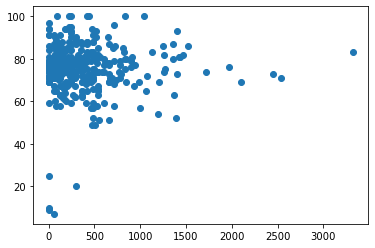

In [9]:
plt.scatter(sleep2['Snore time'],sleep2['Sleep Quality'])

It looks like there is weak positive correlation between sleep quality and snore time let us verify by correlation matrix and it does have a correlation coefficient of 0.01

In [10]:
sleep2.corr()

,Sleep Quality,Regularity,Steps,Alarm mode,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Weather temperature (°C)
Sleep Quality,1.000000,0.407832,0.022660,NaN,-0.071902,-0.032552,0.765470,0.730501,0.238017,0.135847,0.012285,0.142699
Regularity,0.407832,1.000000,0.048182,NaN,-0.094701,0.034898,0.394284,0.383734,0.109061,0.049346,0.047348,0.061353
Steps,0.022660,0.048182,1.000000,NaN,-0.081897,0.114531,0.084154,0.060061,-0.037149,0.138269,0.005900,-0.020269
Alarm mode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Pressure (Pa),-0.071902,-0.094701,-0.081897,NaN,1.000000,0.079189,-0.111434,-0.143839,0.103255,-0.035914,0.150739,0.087884
Movements per hour,-0.032552,0.034898,0.114531,NaN,0.079189,1.000000,-0.017683,0.097038,-0.259286,-0.030188,-0.115164,0.309918
Time in bed (seconds),0.765470,0.394284,0.084154,NaN,-0.111434,-0.017683,1.000000,0.888119,0.149123,0.138196,0.149124,-0.034749
Time asleep (seconds),0.730501,0.383734,0.060061,NaN,-0.143839,0.097038,0.888119,1.000000,-0.022513,0.100296,0.081814,-0.050423
Time before sleep (seconds),0.238017,0.109061,-0.037149,NaN,0.103255,-0.259286,0.149123,-0.022513,1.000000,0.085067,0.036890,0.255894
Did snore,0.135847,0.049346,0.138269,NaN,-0.035914,-0.030188,0.138196,0.100296,0.085067,1.000000,0.115219,-0.013866
